<a href="https://colab.research.google.com/github/MohamedElashri/HEP-ML/blob/master/Higgs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
# supress warnings
import warnings
warnings.filterwarnings("ignore")


In [45]:
# data from 
# Sylvie Brunet, Abha Eli Phoboo, and Cian O’Luanaigh. ATLAS sees Higgs boson decay to fermions
# ATLAS Collaboration

df=pd.read_csv('https://raw.githubusercontent.com/MohamedElashri/HEP-ML/master/Data/Higgs_data.csv')

In [ ]:
# lets tead our data header.
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


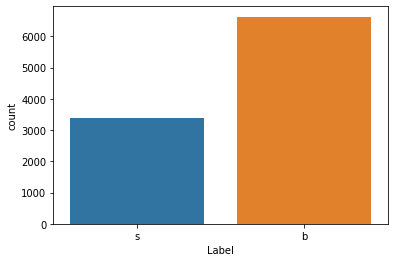

In [ ]:
# lets see how many points in each label.
import seaborn as sns
sns.countplot(df['Label'],label="Count")
plt.show()

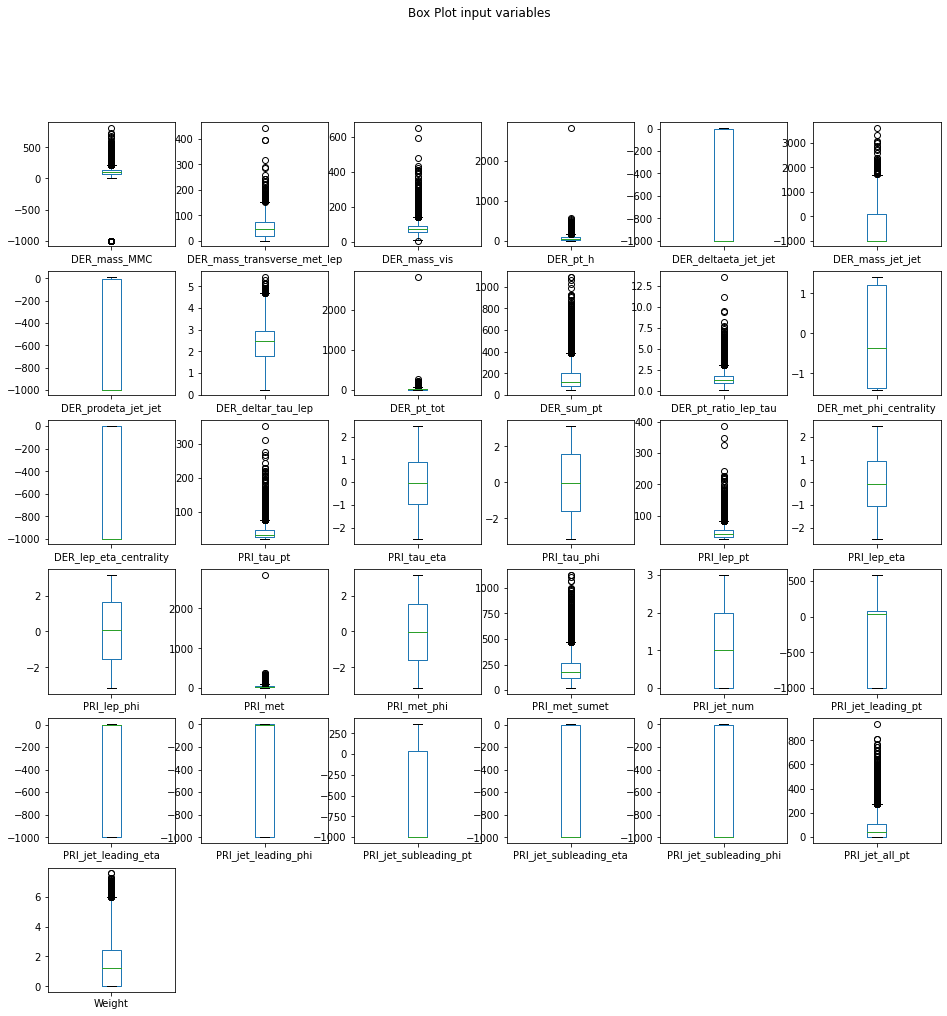

In [ ]:
# we want only the features now. lets investigate them via box plot for each variable and drop label as it is not a variable.
df.drop('Label', axis=1).plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(16,16), 
                                        title='Box Plot input variables')
plt.savefig('cs_box')
plt.show()

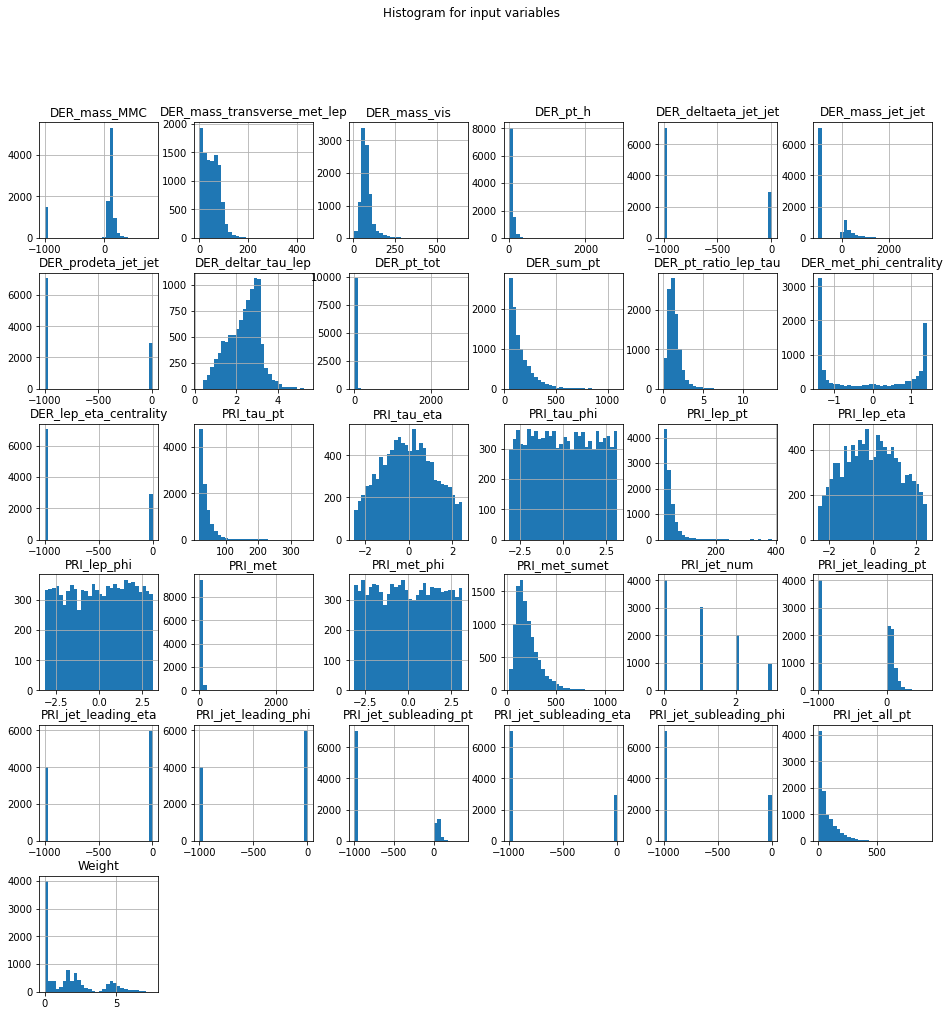

In [ ]:
# time to plot histograms for the features
import pylab as pl
df.drop('Label' ,axis=1).hist(bins=30, figsize=(16,16))
pl.suptitle("Histogram for input variables")
plt.savefig('fruits_hist')
plt.show()

In [ ]:
# get the columns index names so that it is easier to name our features later
df.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [ ]:
# lets now define the feature list based on our columns index names
feature_names = ['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight']
X = df[feature_names]
y = df['Label']

In [ ]:
# use sklearn to define our model and split our data to training and test sets. 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 31)
(2500, 31)
(7500,)
(2500,)


In [ ]:
# training function
dfTrain = pd.DataFrame(data=np.column_stack((scaler.inverse_transform(X_train), y_train)),
                       columns=['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'])
accTrain=[]


In [ ]:
# test function

dfTest = pd.DataFrame(data=np.column_stack((scaler.inverse_transform(X_test), y_test)),
                      columns=['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'])
accTest=[]

In [ ]:
# we are testing different algorithms together so lets define a list with their name to embed in our training
modelNames=['Logistic', 'DecisionTress','KNN','LDA','GuassianNB','SVM']

In [ ]:
# define our prediction
dfPredictions=pd.DataFrame(data=np.column_stack((scaler.inverse_transform(X_test), y_test)),columns=['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'])

In [ ]:
# define a summary function
dfResultsSummary=pd.DataFrame(data=np.row_stack(modelNames), columns=['Model'])

In [ ]:
print(dfPredictions)
print(dfResultsSummary)

     DER_mass_MMC DER_mass_transverse_met_lep  ...      Weight Label
0         109.146                       8.307  ...   0.0186361     s
1         105.492                       25.67  ...   0.0186361     s
2          127.42                      41.426  ...   0.0186361     s
3         129.726                       10.64  ...   0.0186361     s
4          65.301                      49.675  ...      4.5865     b
...           ...                         ...  ...         ...   ...
2495         -999                       93.17  ...     4.79542     b
2496         -999                      84.931  ...    0.744056     b
2497       79.396                      64.562  ...     2.30735     b
2498      103.837                      38.709  ...  0.00150271     s
2499      163.216                     107.553  ...     2.48362     b

[2500 rows x 32 columns]
           Model
0       Logistic
1  DecisionTress
2            KNN
3            LDA
4     GuassianNB
5            SVM


**Now lets start the training for each algorithm**

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.93
Accuracy of Logistic regression classifier on test set: 0.94


In [ ]:
accTrain.append(logreg.score(X_train,y_train))
accTest.append(logreg.score(X_test,y_test))
dfPredictions[modelNames[0]+'_pred'] = logreg.predict(X_test)

# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [ ]:
accTrain.append(clf.score(X_train,y_train))
accTest.append(clf.score(X_test,y_test))
dfPredictions[modelNames[1]+'_pred'] = clf.predict(X_test)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86


In [ ]:
accTrain.append(knn.score(X_train,y_train))
accTest.append(knn.score(X_test,y_test))
dfPredictions[modelNames[2]+'_pred'] = knn.predict(X_test)

# LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.90
Accuracy of LDA classifier on test set: 0.89


In [ ]:
accTrain.append(lda.score(X_train,y_train))
accTest.append(lda.score(X_test,y_test))
dfPredictions[modelNames[3]+'_pred'] = lda.predict(X_test)

# Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.95
Accuracy of GNB classifier on test set: 0.95


In [ ]:
accTrain.append(gnb.score(X_train,y_train))
accTest.append(gnb.score(X_test,y_test))
dfPredictions[modelNames[5]+'_pred'] = gnb.predict(X_test)

# SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.92
Accuracy of SVM classifier on test set: 0.92


In [ ]:
accTrain.append(svm.score(X_train,y_train))
accTest.append(svm.score(X_test,y_test))
dfPredictions[modelNames[5]+'_pred'] = svm.predict(X_test)


In [ ]:
dfResultsSummary['acc_train']=accTrain
dfResultsSummary['acc_test']=accTest


In [ ]:
accTrain

[0.9336,
 1.0,
 0.9037333333333334,
 0.8966666666666666,
 0.9469333333333333,
 0.9190666666666667]

In [ ]:
accTest

[0.9372, 1.0, 0.8604, 0.8872, 0.9548, 0.9188]

In [ ]:
dfResultsSummary

,Model,acc_train,acc_test
0,Logistic,0.933600,0.9372
1,DecisionTress,1.000000,1.0000
2,KNN,0.903733,0.8604
3,LDA,0.896667,0.8872
4,GuassianNB,0.946933,0.9548
5,SVM,0.919067,0.9188


In [ ]:
dfTrain.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,58.496,57.18,41.678,34.64,-999,-999,-999,1.93,34.64,49.897,1.255,-0.388,-999,22.125,-2.142,-2.558,27.772,-1.657,-0.69,30.829,2.88,130.316,0,-999,-999,-999,-999,-999,-999,0,2.02191,b
1,130.708,67.3,79.35,134.895,-999,-999,-999,1.802,44.967,210.205,0.57,0.867,-999,60.064,1.026,-1.733,34.218,2.135,-0.313,67.843,-1.859,387.224,1,115.922,-1.327,1.27,-999,-999,-999,115.922,0.00150271,s
2,177.874,108.602,86.564,31.787,-999,-999,-999,3.146,31.787,72.713,2.152,-1.094,-999,23.068,-2.133,1.215,49.645,-0.639,-2.299,59.418,0.803,78.826,0,-999,-999,-999,-999,-999,-999,0,2.58149,b
3,75.155,53.258,65.509,21.491,-999,-999,-999,2.068,21.491,63.329,0.84,-1.399,-999,34.411,0.113,0.871,28.918,1.566,2.344,26.911,-1.403,123.379,0,-999,-999,-999,-999,-999,-999,0,2.18346,b
4,88.92,9.326,63.434,27.932,-999,-999,-999,2.542,27.932,66.162,0.666,1.394,-999,39.715,-2.073,0.266,26.447,-1.596,2.763,5.78,1.989,122.919,0,-999,-999,-999,-999,-999,-999,0,0.0186361,s


In [ ]:
dfTest.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,109.146,8.307,82.867,3.706,-999,-999,-999,3.08,3.706,82.781,1.006,-1.413,-999,41.274,-0.366,0.97,41.507,-0.469,-2.109,4.221,-2.747,140.708,0,-999,-999,-999,-999,-999,-999,0,0.0186361,s
1,105.492,25.67,83.365,24.406,-999,-999,-999,2.597,24.406,72.056,0.926,-1.201,-999,37.412,-2.415,-0.103,34.644,-1.05,-2.312,16.185,2.825,135.498,0,-999,-999,-999,-999,-999,-999,0,0.0186361,s
2,127.42,41.426,95.135,3.374,-999,-999,-999,2.84,3.374,86.727,0.89,-1.409,-999,45.891,1.459,-2.029,40.835,0.473,1.59,23.458,0.124,121.257,0,-999,-999,-999,-999,-999,-999,0,0.0186361,s
3,129.726,10.64,87.275,69.824,-999,-999,-999,2.493,1.386,159.469,1.463,1.239,-999,36.612,-0.513,-1.345,53.575,-1.123,2.522,36.438,2.763,207.245,1,69.282,-0.453,-0.146,-999,-999,-999,69.282,0.0186361,s
4,65.301,49.675,49.392,3.436,-999,-999,-999,2.346,3.436,54.019,1.517,-1.402,-999,21.461,1.606,0.876,32.558,1.962,-3.088,22.941,-0.808,133.638,0,-999,-999,-999,-999,-999,-999,0,4.5865,b


In [ ]:
dfPredictions.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,Logistic_pred,DecisionTress_pred,KNN_pred,LDA_pred,SVM_pred
0,109.146,8.307,82.867,3.706,-999,-999,-999,3.08,3.706,82.781,1.006,-1.413,-999,41.274,-0.366,0.97,41.507,-0.469,-2.109,4.221,-2.747,140.708,0,-999,-999,-999,-999,-999,-999,0,0.0186361,s,s,s,s,s,s
1,105.492,25.67,83.365,24.406,-999,-999,-999,2.597,24.406,72.056,0.926,-1.201,-999,37.412,-2.415,-0.103,34.644,-1.05,-2.312,16.185,2.825,135.498,0,-999,-999,-999,-999,-999,-999,0,0.0186361,s,s,s,s,s,s
2,127.42,41.426,95.135,3.374,-999,-999,-999,2.84,3.374,86.727,0.89,-1.409,-999,45.891,1.459,-2.029,40.835,0.473,1.59,23.458,0.124,121.257,0,-999,-999,-999,-999,-999,-999,0,0.0186361,s,s,s,s,s,s
3,129.726,10.64,87.275,69.824,-999,-999,-999,2.493,1.386,159.469,1.463,1.239,-999,36.612,-0.513,-1.345,53.575,-1.123,2.522,36.438,2.763,207.245,1,69.282,-0.453,-0.146,-999,-999,-999,69.282,0.0186361,s,s,s,s,s,s
4,65.301,49.675,49.392,3.436,-999,-999,-999,2.346,3.436,54.019,1.517,-1.402,-999,21.461,1.606,0.876,32.558,1.962,-3.088,22.941,-0.808,133.638,0,-999,-999,-999,-999,-999,-999,0,4.5865,b,b,b,b,b,b


In [ ]:
dfTrain.to_csv('train_higgs.csv')
dfTest.to_csv('test_higgs.csv')
dfResultsSummary.to_csv('summary_higgs.csv')
dfPredictions.to_csv('predictions_higgs.csv')

In [ ]:
dfResultsSummary

,Model,acc_train,acc_test
0,Logistic,0.933600,0.9372
1,DecisionTress,1.000000,1.0000
2,KNN,0.903733,0.8604
3,LDA,0.896667,0.8872
4,GuassianNB,0.946933,0.9548
5,SVM,0.919067,0.9188


# KNN - Analysis

In [ ]:
import sklearn.metrics as metrics

k_range = range(1, 20)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.8464, 0.8304, 0.8516, 0.8456, 0.8604, 0.8564, 0.8604, 0.862, 0.858, 0.856, 0.8528, 0.854, 0.8576, 0.8644, 0.8616, 0.8636, 0.8588, 0.8592, 0.8572]


Text(0.5, 1.0, 'Number of Clusters Vs Prediction Scores')

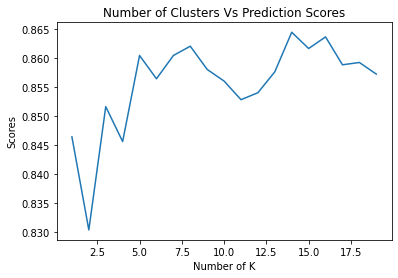

In [ ]:
plt.plot(range(1,20),scores)
plt.xlabel('Number of K')
plt.ylabel('Scores')
plt.title('Number of Clusters Vs Prediction Scores')

# Logistic regression 

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
train_sz, train_errs, cv_errs = learning_curve(estimator=logreg, X=X_train, y=y_train_encoded, cv=4,
                                              train_sizes=np.linspace(0.05, 1, 20),
                                              scoring="neg_mean_squared_error")  

# For each training subset, compute average error over the 3-fold cross val
tr_err = np.mean(train_errs, axis=1)
cv_err = np.mean(cv_errs, axis=1)

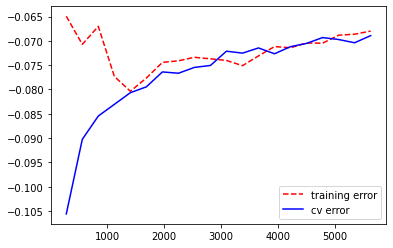

In [ ]:
# Plot the errors to make a learning curve!
fig, ax = plt.subplots()
ax.plot(train_sz, tr_err, linestyle="--", color="r", label="training error")
ax.plot(train_sz, cv_err, linestyle="-", color="b", label="cv error")

#snp.labs("Training Set Size", "Score (4-Fold CV avg)", "LC with High Bias")
ax.legend(loc="lower right")

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

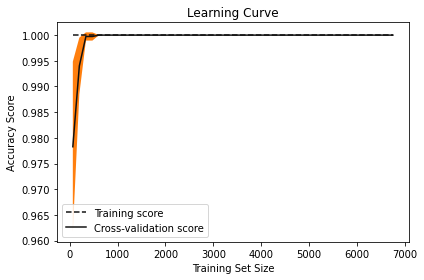

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train, 
                                                        y_train_encoded,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std)

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()